In [1]:
import torch, torchvision
import math
import numpy as np

In [13]:
dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda")  # Uncomment this to run on GPU

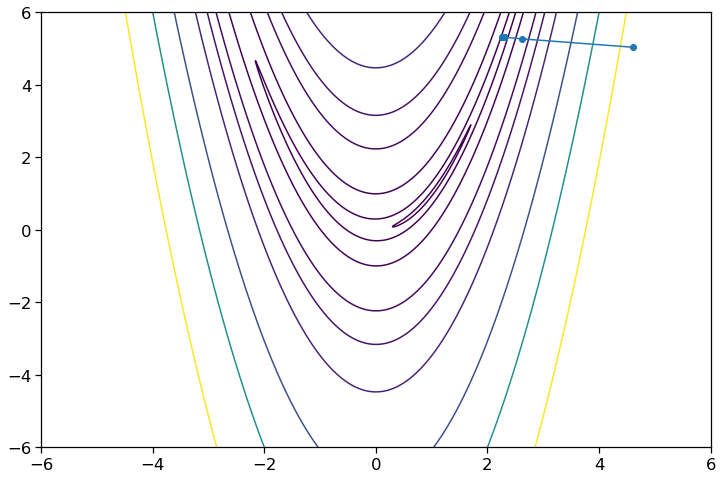

In [49]:
class GB:
    def __init__(self, x):
        self.f = lambda x: (1-x[0])**2 +100 * (x[1] - x[0]**2)**2
        self.x = x
        self.learning_rate = 1e-5
        self.step_num = 1
        self.G = 0
    def step(self):
        loss = self.f(self.x)
        loss.backward()
        self.x.data -= self.learning_rate * self.x.grad 
        self.x.grad *= 0.6
        self.step_num += 1
    def get_value(self):
        return self.f(self.x).data

from IPython.display import clear_output

myGb = GB(torch.tensor([5., 5.], requires_grad=True, dtype=torch.float64, device=device))

rozenbrok = lambda x, y: (1-x)**2 +100 * (y - x**2)**2
x, y = np.mgrid[-6:6:1000j,
                -6:6:1000j]
z = rozenbrok(x, y)
lev = [5e-1, 1e1, 1e2, 5e2, 1e3, 2e3, 5e3, 1e4, 2e4]
way = []
for i in range(100):
    myGb.step()
    if i%5 == 0:
        clear_output(True)
        fig, ax = plt.subplots(figsize=(12, 8))
        ax.contour(x, y, z, levels=lev)
        way.append(np.array(myGb.x.data))
        ax.plot(np.array(way)[:, 0], np.array(way)[:, 1], '-o')
        plt.show()
        